# Python Data Analysis Series: Day 5!
## Sea Level Prediction Using Linear Regression

<img src = https://cdn.dribbble.com/users/394112/screenshots/5958842/polar-bear-global-warming-majica.png width = "1000" height = "100" > 

### Today's Challenge:
In this project, we'll explore the dataset containing global average sea level changes. Our primary objective is to predict sea level changes up to the year 2050.

### Key Data Analytics Objectives:
Our objective for Day 5 is to employ data analysis techniques to predict and gain insightful understanding of sea level changes, extending our projections up to the year 2050.

### Dataset and Library:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import linregress

df = pd.read_csv('epa-sea-level.csv')
df

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN
...,...,...,...,...,...
129,2009,8.586614,8.311024,8.862205,8.046354
130,2010,8.901575,8.618110,9.185039,8.122973
131,2011,8.964567,8.661417,9.267717,8.053065
132,2012,9.326772,8.992126,9.661417,8.457058


### Solution:

Our initial step involves creating a scatter plot for the CSIRO Adjusted Sea Level, spanning from the year 1880 to 2013

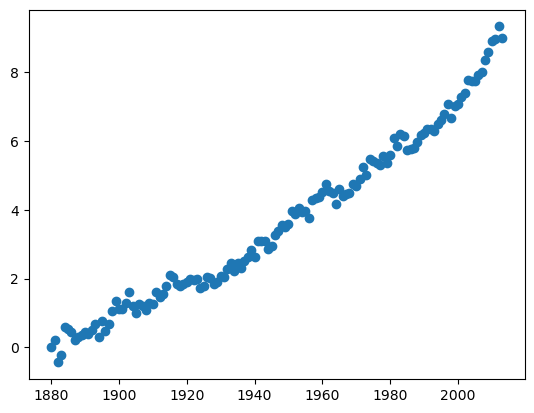

In [2]:
plt.scatter(df["Year"], df["CSIRO Adjusted Sea Level"])

Preparing the dataframe ready for visualization use. 

We use linear regression formula to create fitted line

Y = b + mX
- b as intercept
- m as slope

In [3]:
# Calculate the slope and y-intercept
res = stats.linregress(df["Year"], df["CSIRO Adjusted Sea Level"])
res.slope, res.intercept

(0.0630445840121348, -119.06594196773978)

As we know the slope and y-intercept, we can make the prediction for 2050 using the linear regression formula 

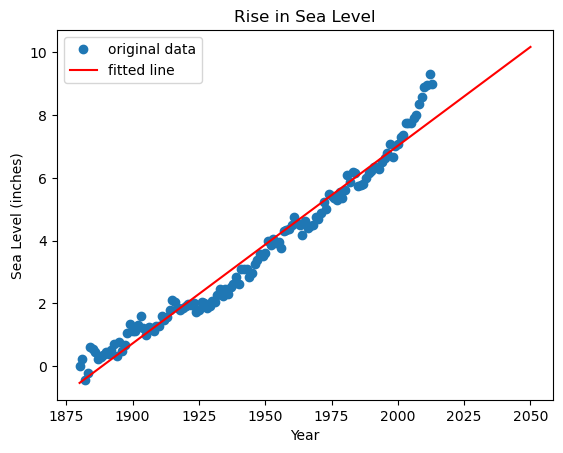

In [4]:
plt.plot(df["Year"], df["CSIRO Adjusted Sea Level"], 'o',
         label='original data')
plt.plot(np.arange(1880,2051), 
         res.intercept + res.slope*np.arange(1880,2051),
         'r', label='fitted line')
plt.xlabel('Year')
plt.ylabel('Sea Level (inches)')
plt.title('Rise in Sea Level')
plt.legend()
plt.show()

As a subtle shift becomes evident around the year 2000, where the plot starts to ascend, we can explore an alternative prediction method. This involves utilizing the slope and intercept values derived from the data spanning from 2000 to 2013.

In [5]:
# Making a new dataframe from 2000 till 2013
df_new = df[df['Year'] >= 2000]

# Calculate the slope and y-intercept from the new dataframe 
res_new = linregress(df_new['Year'], df_new['CSIRO Adjusted Sea Level'])

Now is all set! Let's start plotting the graph

In [6]:
def sea_level_prediction():
    plt.plot(df["Year"], df["CSIRO Adjusted Sea Level"],
             'o', label='Original data')
    plt.plot(np.arange(1880,2051),
             res.intercept + res.slope*np.arange(1880,2051),
             'r', label='Fitted line')
    plt.plot(np.arange(2000,2051),
             res_new.intercept + res_new.slope*np.arange(2000,2051),
             'y', label='Fitted line (2000 & forward)')
    plt.xlabel('Year')
    plt.ylabel('Sea Level (inches)')
    plt.title('Rise in Sea Level')
    plt.legend()
    plt.show()

### Objective:

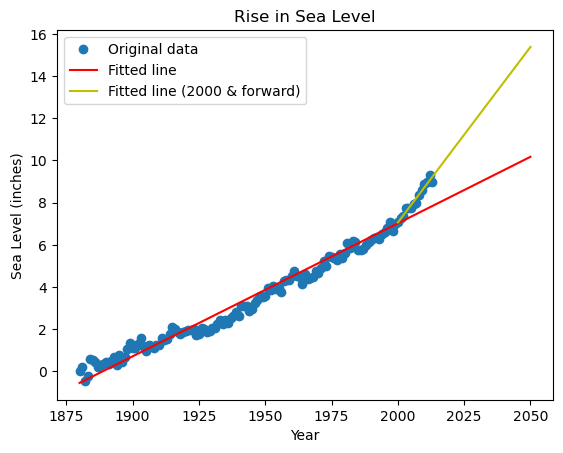

In [7]:
sea_level_prediction()

### Insight:

##### The sea level exhibits a consistent upward trend, but a notable anomaly occurred in the year 2000, resulting in a sea level rise higher than anticipated. If this trend persists, by the end of 2050, we could see a sea level rise of approximately 15 inches, which is 50% higher than the previous estimate of around 10 inches.

### For Fellow Readers:

##### This situation demands our attention and action, as unchecked sea level rise poses a serious threat to our ecosystems. It's crucial that we take immediate measures to mitigate these effects and ensure the sustainability of our planet. Let this data serve as a reminder to be environmentally conscious and to cherish our planet for the benefit of future generations.